In [1]:
import os
from bs4 import BeautifulSoup
import re
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
datasetFolderName = "data/" 
fileName = datasetFolderName + "raw_data_090819.txt"

In [3]:
authors_list = []

In [4]:
with open(fileName, 'r') as file:
    for paper in file:
      soup = BeautifulSoup(paper, features="html.parser")
      authors_list.append(''.join(re.findall('\(.*?\)',soup.i.get_text())))

In [5]:
len(authors_list)

1429

In [6]:
authors_list[:5]

['(University of Michigan)(University of Southern California)(University of Southern California)(University of Southern California)',
 '(Georgia Tech)(Georgia Tech / Facebook AI Research (FAIR)(Georgia Tech / Facebook AI Research (FAIR)(Georgia Institute of Technology)',
 '(University of California, Davis)(University of California, Davis)(UCLA)(UC Davis)',
 '(The University of Adelaide)(Tusimple)(Hong Kong University of Science and Technology)(The University of Adelaide)(University of Adelaide)(Nankai University)(University of Adelaide)',
 '(Seoul National University)(Seoul National University)']

In [7]:
institutions = {
  "Google, Google Brain, DeepMind": [0, "google, deepmind", "industry"],
  "Stanford University": [0, "stanford", "academy"],
  "Massachusetts Institute of Technology": [0, "mit, massachusetts institute of technology", "academy"],
  "University of California, Berkeley": [0, "berkeley", "academy"],
  "Microsoft Research": [0, "microsoft", "industry"],
  "Carnegie Mellon University": [0, "CMU, Carnegie Mellon University", "academy"],
  "Facebook AI Research": [0, "facebook", "industry"],
  "IBM research": [0, "ibm", "industry"],
  "Princeton University": [0, "princeton", "academy"],
  "INRIA": [0, "inria", "academy"],
  "Columbia University": [0, "columbia university", "academy"],
  "Georgia Institute of Technology": [0, "georgia tech, gatech, Georgia Institute of Technology", "academy"],
  "University of Washington": [0, "University of Washington", "academy"],
  "Tsinghua University": [0, "tsinghua", "academy"],
  "University of Oxford": [0, "oxford", "academy"],
  "MILA": [0, "mila", "industry"],
  "University of Texas at Austin": [0, "University of Texas at Austin, UAT, UT-Austin, UT Austin", "industry"],
  "University of California, Los Angeles": [0, "ucla, University of California Los Angeles", "academy"],
  "University of Toronto": [0, "University of Toronto, uoft", "industry"],
  "Cornell University": [0, "cornell", "academy"],
  "University of Southern California": [0, "University of Southern California, USC", "academy"],
  "New York University": [0, "nyu, New York University", "academy"],
  "ETH Zurich": [0, "ETH Zurich, ETHZ, ETH Zürich", "academy"],
  "University of Illinois at Urbana-Champaign": [0, "uiuc, University of Illinois at Urbana", "academy"],
  "EPFL": [0, "EPFL", "academy"],
  "Peking University": [0, "peking university", "academy"],
  "Duke University": [0, "duke", "academy"],
  "Harvard University": [0, "harvard", "academy"],
  "Amazon": [0, "amazon", "industry"],
  "University of Cambridge": [0, "university of cambridge", "academy"],
  "Imperial College London": [0, "imperial", "academy"],
  "Tencent": [0, "Tencent", "industry"],
  "Rutgers": [0, "Rutgers", "academy"],
  "University of Massachusetts Amherst": [0, "Amherst", "academy"],
  "RIKEN": [0, "riken", "industry"],
  "uber": [0, "uber", "industry"],
  "nvidia": [0, "nvidia", "industry"],
  "covariant": [0, "covariant", "industry"],
};



In [8]:
for authors in authors_list:
  for key in institutions:
    flag = False;
    for keyword in institutions[key][1].split(", "):
      if keyword.lower() in authors.lower():
        flag = True
    if flag:
      institutions[key][0] += 1  

In [9]:
institutions

{'Google, Google Brain, DeepMind': [170, 'google, deepmind', 'industry'],
 'Stanford University': [85, 'stanford', 'academy'],
 'Massachusetts Institute of Technology': [86,
  'mit, massachusetts institute of technology',
  'academy'],
 'University of California, Berkeley': [57, 'berkeley', 'academy'],
 'Microsoft Research': [76, 'microsoft', 'industry'],
 'Carnegie Mellon University': [83,
  'CMU, Carnegie Mellon University',
  'academy'],
 'Facebook AI Research': [43, 'facebook', 'industry'],
 'IBM research': [36, 'ibm', 'industry'],
 'Princeton University': [54, 'princeton', 'academy'],
 'INRIA': [36, 'inria', 'academy'],
 'Columbia University': [43, 'columbia university', 'academy'],
 'Georgia Institute of Technology': [30,
  'georgia tech, gatech, Georgia Institute of Technology',
  'academy'],
 'University of Washington': [28, 'University of Washington', 'academy'],
 'Tsinghua University': [34, 'tsinghua', 'academy'],
 'University of Oxford': [41, 'oxford', 'academy'],
 'MILA': [

In [10]:
df = pd.DataFrame.from_dict(institutions, orient='index', columns=["count","keywords", "category"])
df

,count,keywords,category
"Google, Google Brain, DeepMind",170,"google, deepmind",industry
Stanford University,85,stanford,academy
Massachusetts Institute of Technology,86,"mit, massachusetts institute of technology",academy
"University of California, Berkeley",57,berkeley,academy
Microsoft Research,76,microsoft,industry
Carnegie Mellon University,83,"CMU, Carnegie Mellon University",academy
Facebook AI Research,43,facebook,industry
IBM research,36,ibm,industry
Princeton University,54,princeton,academy
INRIA,36,inria,academy


In [11]:
dataPath = "data/handcounted_inst.csv"
df.to_csv(dataPath)
df = df.sort_values(by='count', ascending=False)
df

,count,keywords,category
"Google, Google Brain, DeepMind",170,"google, deepmind",industry
Massachusetts Institute of Technology,86,"mit, massachusetts institute of technology",academy
Stanford University,85,stanford,academy
Carnegie Mellon University,83,"CMU, Carnegie Mellon University",academy
Microsoft Research,76,microsoft,industry
"University of California, Berkeley",57,berkeley,academy
Princeton University,54,princeton,academy
Facebook AI Research,43,facebook,industry
Columbia University,43,columbia university,academy
University of Oxford,41,oxford,academy


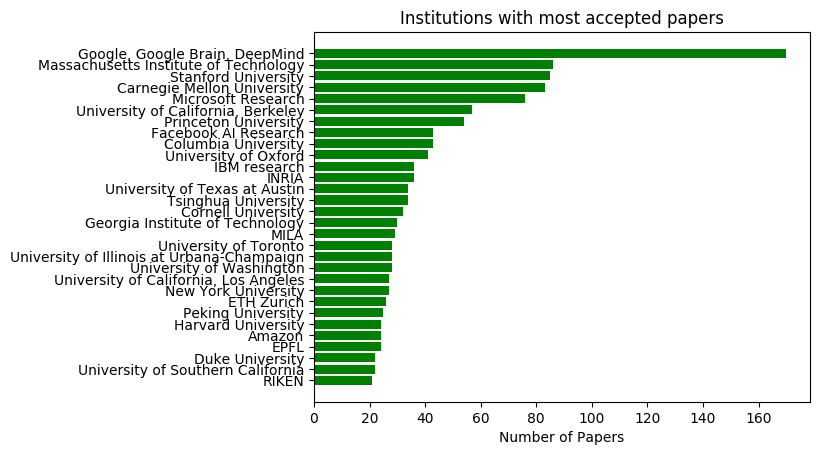

In [16]:
plt.rcdefaults()
fig, ax = plt.subplots()
nTop = 30

nPapers = df["count"].tolist()[:nTop]
institutionNames = list(df[:nTop].index.values)

ax.barh(institutionNames, nPapers, align='center',
        color='green', ecolor='black')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Papers')
ax.set_title('Institutions with most accepted papers')


plt.savefig('imgs/institutions_ranked_by_accepted_papers.png', bbox_inches='tight')

plt.show()